In [1]:
"""%%capture"""
!pip install easyocr
!pip install tk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 22.5 MB/s eta 0:00:00


In [7]:
import easyocr
import cv2 as cv
import matplotlib.pyplot as plt
import lcd_font
import numpy as np
from PIL import ImageFont, ImageDraw, Image
font_data = lcd_font.font()
del lcd_font

In [3]:
def showImage(data, convert = False, gray = True):
    plt.figure(figsize = (10, 6))
    if convert is True:
        data = data[:, :, ::-1]  # BGR -> RGB
    if gray is True:
        color = 'gray'
    else:
        color = None
    plt.imshow(data, cmap = color)
    plt.axis('off')
    return plt.show()

In [4]:
# write_text function for ไทย Open CV
# don't import copy this code to use in your program
# How to use
# import lcd_font
# font_data = lcd_font.font()
# del lcd_font

def write_text(image,x,y,text):
    global font_data
    dimg = np.zeros((26,100,3),np.uint8)
    h=10
    chk1=0
    chk2=0
    for k in text:
        if chk2>0:
            if chk2==1:
                kk=ord(k)+3456
            else:
                kk=ord(k)+3520
            chk1=0
            chk2=0
        else:
            if chk1==1 and chk2==0:
                if ord(k)==184:
                    chk2=1
                elif ord(k)==185:
                    chk2=2
                continue
            if ord(k)==224:
                chk1=1
                continue
            else:
                kk=ord(k)
        vv=0
        if kk>=3584:
            kk=kk-3424
        #very upper Thai font
        if kk>=232 and kk<=238:
            vv=(-12)
            h=h-9
        #upper Thai font
        if kk==209 or (kk>=212 and kk<=215) or kk==231:
            vv=(-8)
            h=h-9
        #lower Thai font
        if kk>=216 and kk<=218:
            vv=9
            h=h-9
        for j in range(8):
            nfont=font_data[kk][j]
            v=10
            for i in range(8):
                if nfont>=(2**(7-i)):
                    vvv=v+vv
                    if vvv>=0 and vv<=26 and h>=0 and h<=90:
                        dimg[vvv][h]=[255,255,255]
                    nfont=nfont-(2**(7-i))
                v=v+1
            h=h+1
        h=h+1
    imageout = image.copy()
    if y>=0 and x>=0:
        if x+100<=imageout.shape[1] and y+26<=imageout.shape[0]:
            imageout[0+y:0+y+26 , 0+x:0+x+100] = dimg
    return imageout

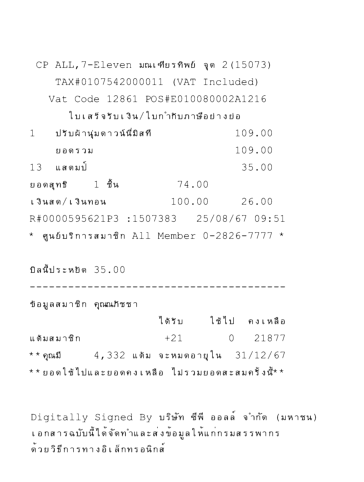

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

[([[143, 284], [221, 284], [221, 335], [143, 335]], 'cp', 0.9936681815022748), ([[249, 278], [693, 278], [693, 344], [249, 344]], 'all, 7-eleven', 0.41413411833483527), ([[725, 293], [826, 293], [826, 334], [725, 334]], 'มณ!', 0.6801345125794451), ([[829, 282], [1054, 282], [1054, 337], [829, 337]], 'ทียรทิพย์', 0.9599262070286958), ([[1089, 289], [1166, 289], [1166, 345], [1089, 345]], ' จด', 0.4774235188961029), ([[1194, 281], [1481, 281], [1481, 342], [1194, 342]], '2 (15073)', 0.9846863263331573), ([[255, 377], [873, 377], [873, 437], [255, 437]], '1ax=0107542000011', 0.7811524074401238), ([[915, 378], [1058, 378], [1058, 440], [915, 440]], 'wat', 0.8911574202598559), ([[1090, 377], [1409, 377], [1409, 439], [1090, 439]], 'included)', 0.9994357425648857), ([[217, 479], [329, 479], [329, 530], [217, 530]], 'vat', 0.9858182140835355), ([[360, 477], [511, 477], [511, 532], [360, 532]], 'code', 0.8897575689475159), ([[544, 475], [728, 475], [728, 532], [544, 532]], '128 61', 0.63507087

In [5]:
img = cv.imread('/content/Image.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# showImage(gray, convert = False, gray = True)
blur = cv.GaussianBlur(gray, (5, 5), 0)
# showImage(blur, convert = False, gray = True)
_, biThresh = cv.threshold(blur, 125, 255, cv.THRESH_BINARY)
showImage(biThresh, convert = False, gray = True)
reader = easyocr.Reader(['en','th'],gpu=True)
result = reader.readtext(biThresh, detail=2)
print(result)

[([[143, 284], [221, 284], [221, 335], [143, 335]], 'cp', 0.9936681815022748), ([[249, 278], [693, 278], [693, 344], [249, 344]], 'all, 7-eleven', 0.41413411833483527), ([[725, 293], [826, 293], [826, 334], [725, 334]], 'มณ!', 0.6801345125794451), ([[829, 282], [1054, 282], [1054, 337], [829, 337]], 'ทียรทิพย์', 0.9599262070286958), ([[1089, 289], [1166, 289], [1166, 345], [1089, 345]], ' จด', 0.4774235188961029), ([[1194, 281], [1481, 281], [1481, 342], [1194, 342]], '2 (15073)', 0.9846863263331573), ([[255, 377], [873, 377], [873, 437], [255, 437]], '1ax=0107542000011', 0.7811524074401238), ([[915, 378], [1058, 378], [1058, 440], [915, 440]], 'wat', 0.8911574202598559), ([[1090, 377], [1409, 377], [1409, 439], [1090, 439]], 'included)', 0.9994357425648857), ([[217, 479], [329, 479], [329, 530], [217, 530]], 'vat', 0.9858182140835355), ([[360, 477], [511, 477], [511, 532], [360, 532]], 'code', 0.8897575689475159), ([[544, 475], [728, 475], [728, 532], [544, 532]], '128 61', 0.63507087

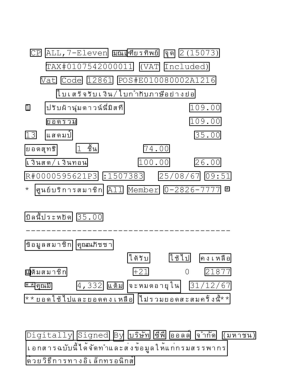

In [24]:
print(result)
for value in result :
  cord = list(value)[0][0::2]
  word = list(value)[1]
  print((cord[0][0],cord[0][1]),(cord[1][0],cord[1][1]))
  cv.rectangle(img,(int(cord[0][0]),int(cord[0][1])),(int(cord[1][0]),int(cord[1][1])),(0,0,0),3)
plt.imshow(img)
plt.axis('off')
plt.show()
